In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
import tensorflow as tf
import numpy as np
import pandas as pd
import sys
import cv2
import json
from json import *
from PIL import Image

In [2]:
img = cv2.imread('../image/logo/logo1.jpg')
img1 = cv2.imread('../image/logo/logo1.jpg')
img2 = cv2.imread('../image/logo/logo1.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)))

fig, ax = plt.subplots(4,4)
r = 0
c = 0
count = 0
image_result = []
for i in range(len(contours)):

    imgage = cv2.imread('../image/logo/logo1.jpg')

    color = (255, 0, 0)
    result = cv2.drawContours(imgage, contours, i, color, 2, cv2.LINE_8, hierarchy, 2)
    image_result.append(result)

    if r < 4:
        ax[c,r].imshow(image_result[count])
        r += 1
    elif c < 4:
        r = 0
        ax[c,r].imshow(image_result[count])
        c += 1
    count += 1
        
print("size", len(contours))


SyntaxError: invalid syntax (<ipython-input-2-1a193ccb3f54>, line 6)

In [9]:
img = cv2.imread('../image/logo/logo_huawei.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

## Find outer contours 
_, cnts= cv2.findContours(gray,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

## Draw 
canvas = np.zeros_like(img)
cv2.drawContours(canvas , cnts, -1, (0, 255, 0), 1)

plt.imshow(canvas)

error: OpenCV(4.5.2) /tmp/pip-req-build-vrhoqk3o/opencv/modules/imgproc/src/drawing.cpp:2501: error: (-215:Assertion failed) npoints > 0 in function 'drawContours'


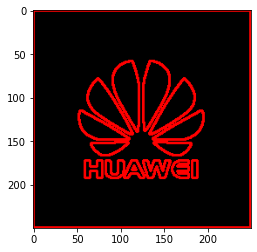

In [11]:
img = cv2.imread('../image/logo/logo_huawei.jpg')
imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

canvas = np.zeros_like(img)
result = cv2.drawContours(canvas, contours, 0, (255,0,0), 2, cv2.LINE_8, hierarchy, 2)

plt.imshow(result)


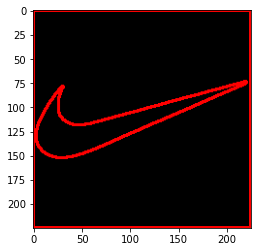

In [23]:
def read_data(data_path, data_file):
    with open(data_path + '/' + data_file) as f:
        data_file = json.load(f)
    return data_file


image = read_data("../image/logo/", "logo_nike.json")
# print(image)
plt.imshow(image["contours"])

In [25]:
# print("lenght", len(image["contours"]))
# print("Data", image["contours"]
# image = np.array(image["contours"])
image = read_data("../image/logo", "logo_huawei.json")
img = np.asarray(image["contours"])

# image = Image.fromarray(image["contours"])
# image = cv2.imread(image["contours"], 0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)

plt.imshow(laplacian)

error: OpenCV(4.5.2) /tmp/pip-req-build-vrhoqk3o/opencv/modules/imgproc/src/filter.simd.hpp:3173: error: (-213:The function/feature is not implemented) Unsupported combination of source format (=20), and destination format (=22) in function 'getLinearFilter'


In [20]:
img = np.asarray(image["contours"])
# image = Image.fromarray(img)
img = cv2.imread(img, CV_8UC1)
img = cv2.bitwise_not(img)
th2 = cv2.adaptiveThreshold(img,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,-2)

horizontal = th2
vertical = th2
rows,cols = horizontal.shape

#inverse the image, so that lines are black for masking
horizontal_inv = cv2.bitwise_not(horizontal)
#perform bitwise_and to mask the lines with provided mask
masked_img = cv2.bitwise_and(img, img, mask=horizontal_inv)
#reverse the image back to normal
masked_img_inv = cv2.bitwise_not(masked_img)

horizontalsize = int(cols / 30)
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontalsize,1))
horizontal = cv2.erode(horizontal, horizontalStructure, (-1, -1))
horizontal = cv2.dilate(horizontal, horizontalStructure, (-1, -1))

verticalsize = int(rows / 30)
verticalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (1, verticalsize))
vertical = cv2.erode(vertical, verticalStructure, (-1, -1))
vertical = cv2.dilate(vertical, verticalStructure, (-1, -1))

vertical = cv2.bitwise_not(vertical)

#step1
edges = cv2.adaptiveThreshold(vertical,255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,3,-2)

#step2
kernel = np.ones((2, 2), dtype = "uint8")
dilated = cv2.dilate(edges, kernel)

# step3
smooth = vertical.copy()

#step 4
smooth = cv2.blur(smooth, (4,4))

#step 5
(rows, cols) = np.where(img == 0)
vertical[rows, cols] = smooth[rows, cols]

plt.imshow(vertical)


NameError: name 'CV_8UC1' is not defined